In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor




Data Overview

In [89]:
df = pd.read_csv("C:\\Users\\User\\Documents\\GitHub\\Canser-Prediction-Analysis\\data\\The_Cancer_data_1500_V2.csv")
df.head()


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [90]:
df.tail()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1
1499,67,1,23.663104,0,0,2.525860,2.856600,1,0


In [91]:
df.dtypes

Age                   int64
Gender                int64
BMI                 float64
Smoking               int64
GeneticRisk           int64
PhysicalActivity    float64
AlcoholIntake       float64
CancerHistory         int64
Diagnosis             int64
dtype: object

In [92]:
# view dataset
df.shape 

(1500, 9)

In [93]:
#summary statistics-numarical columns
df.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


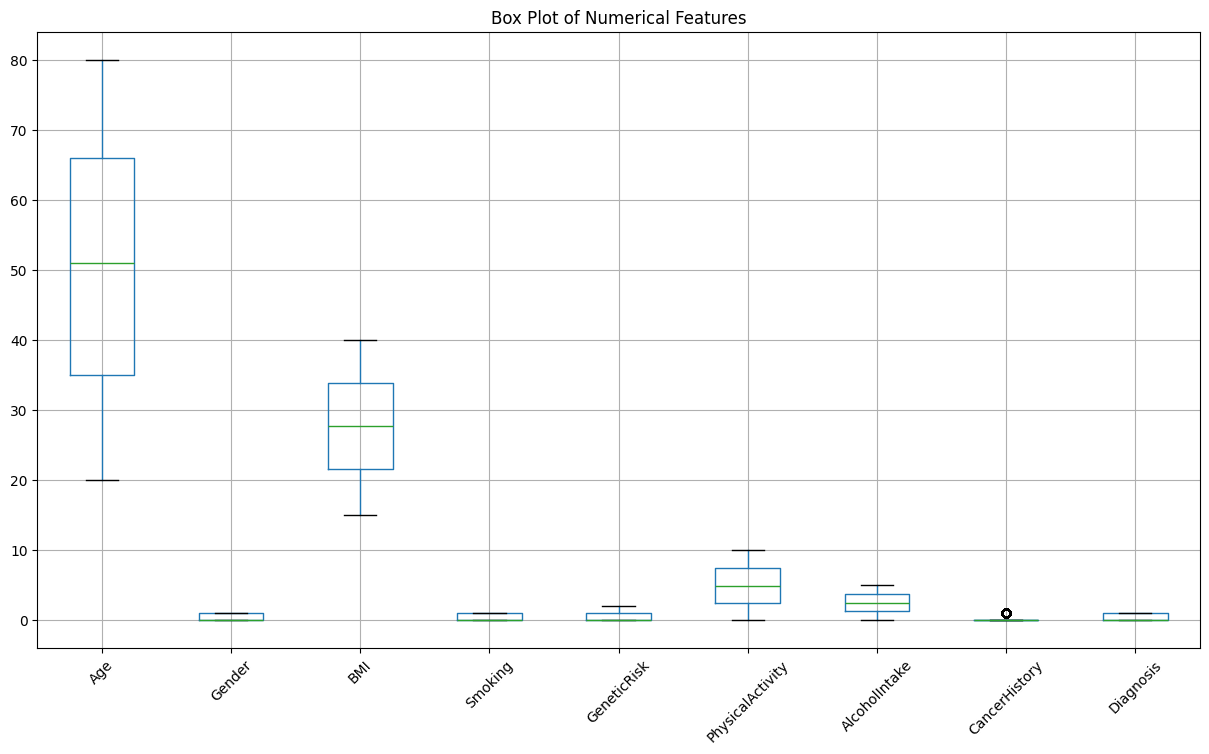

In [94]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot()
plt.title("Box Plot of Numerical Features")
plt.xticks(rotation=45)
plt.show()



Data Preprocessing

In [95]:
#missing values
df.isnull().sum()

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64

In [96]:
#check total missing values
df.isnull().sum().sum()

np.int64(0)

In [97]:
#check duplicates
df.duplicated().sum()

np.int64(0)

In [98]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df.select_dtypes(include=[int, float])))
outliers_z = (z_scores > 3).sum(axis=0)

print("Outliers detected (Z-score > 3):")
print(outliers_z)


Outliers detected (Z-score > 3):
[0 0 0 0 0 0 0 0 0]


In [99]:
#detect outliers
import numpy as np

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers in each column:")
print(outliers)


Number of outliers in each column:
Age                   0
Gender                0
BMI                   0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
AlcoholIntake         0
CancerHistory       216
Diagnosis             0
dtype: int64


In [100]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows to remove outliers
df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_no_outliers.shape)




Shape before removing outliers: (1500, 9)
Shape after removing outliers: (1284, 9)


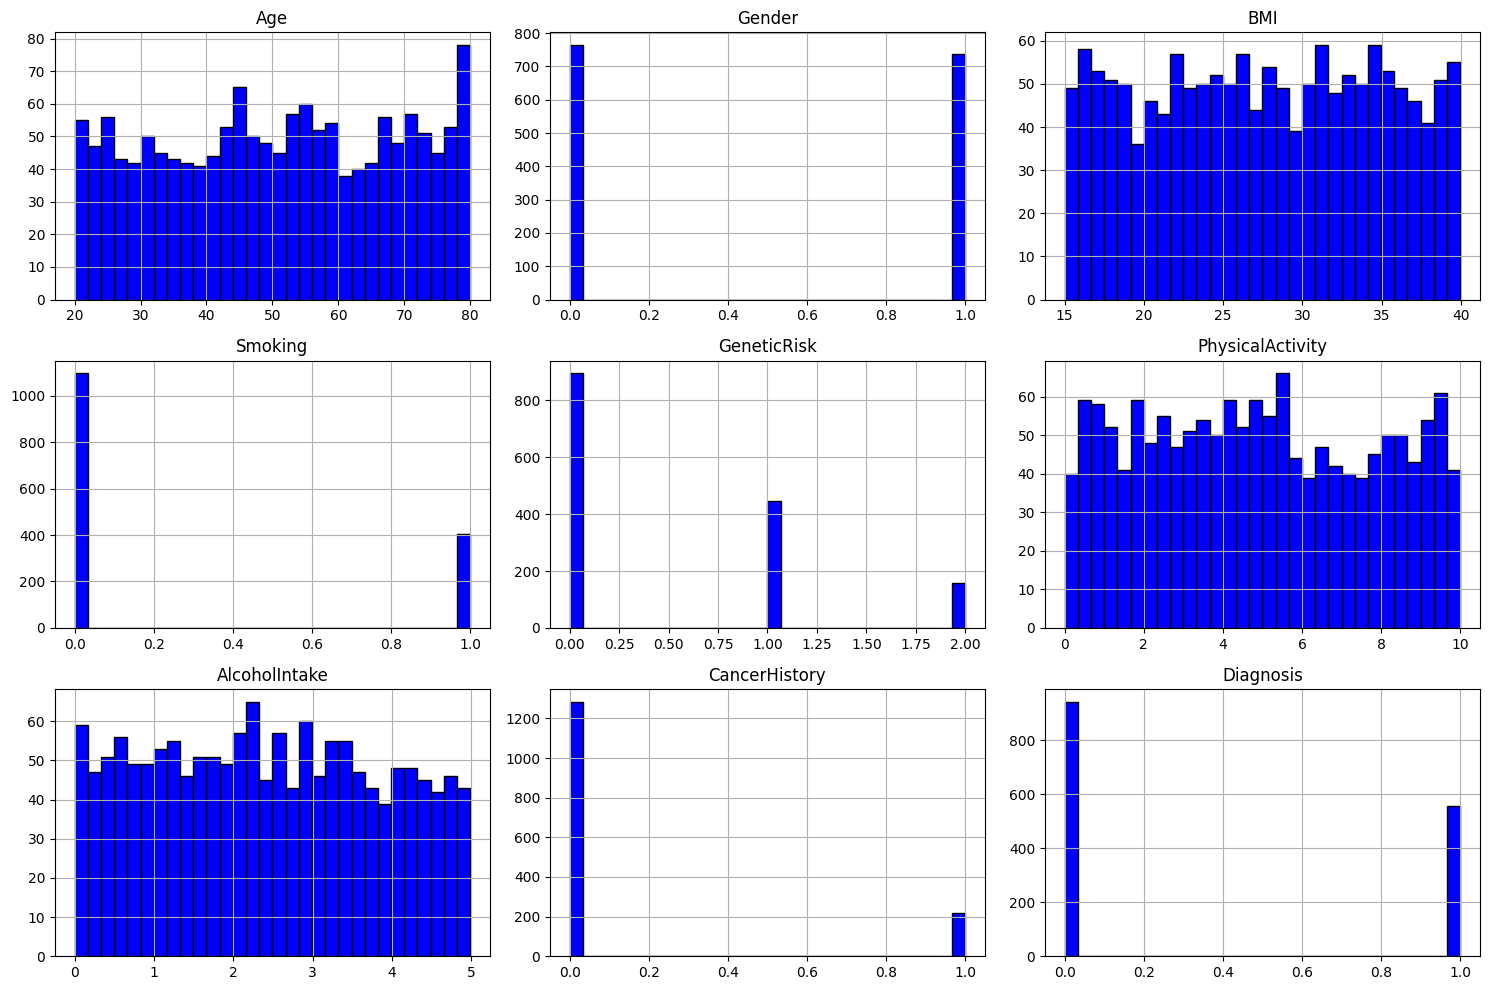

In [101]:
df.hist(bins=30, figsize=(15, 10), color='blue', edgecolor='black')
plt.tight_layout()
plt.savefig("numerical_features_distribution.png")
plt.show()

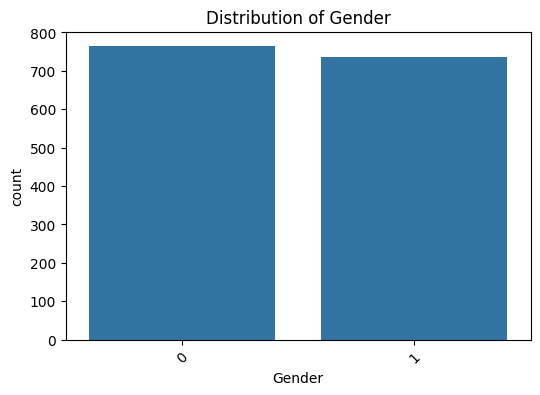

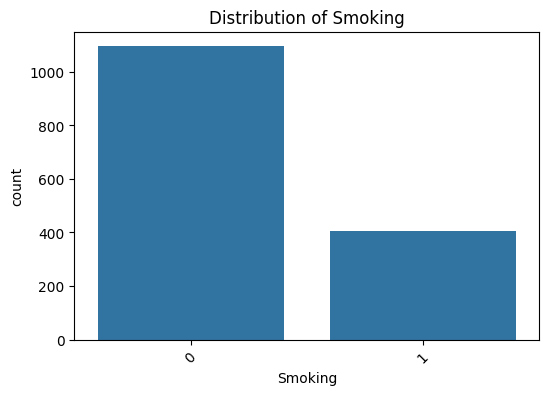

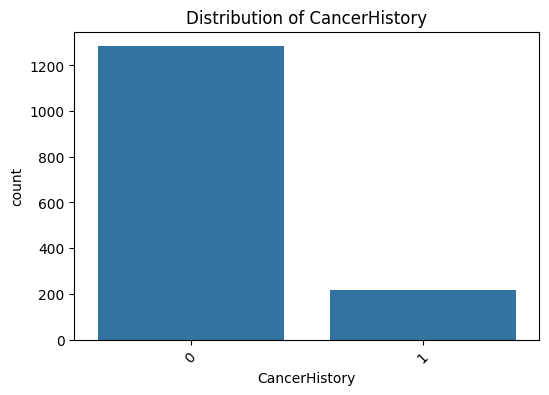

In [53]:
binary_cats = ['Gender', 'Smoking', 'CancerHistory']

for col in binary_cats:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [54]:
#summary statistics -numerical and categorical columns
df.describe(include='all')

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


In [55]:
# finding all mean values
df.mean()

Age                 50.320000
Gender               0.490667
BMI                 27.513321
Smoking              0.269333
GeneticRisk          0.508667
PhysicalActivity     4.897929
AlcoholIntake        2.417987
CancerHistory        0.144000
Diagnosis            0.371333
dtype: float64

In [56]:
df['BMI'].median()

np.float64(27.598494363554558)

In [57]:
df['Gender'].value_counts()


Gender
0    764
1    736
Name: count, dtype: int64

In [58]:
df['Diagnosis'].value_counts(normalize=True) * 100


Diagnosis
0    62.866667
1    37.133333
Name: proportion, dtype: float64

Group-Based Descriptions

In [59]:
#Average BMI by diagnosis
df.groupby('Diagnosis')['BMI'].mean()


Diagnosis
0    26.471469
1    29.277175
Name: BMI, dtype: float64

In [60]:
# Average alcohol intake by cancer history
df.groupby('CancerHistory')['AlcoholIntake'].mean()


CancerHistory
0    2.385746
1    2.609644
Name: AlcoholIntake, dtype: float64

In [61]:
# Average physical activity by smoking level
df.groupby('Smoking')['PhysicalActivity'].mean()


Smoking
0    4.974151
1    4.691148
Name: PhysicalActivity, dtype: float64

In [62]:
#bascic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [63]:
df['Gender'].unique()

array([1, 0])

In [66]:
df.skew()


Age                -0.032819
Gender              0.037377
BMI                -0.021391
Smoking             1.040986
GeneticRisk         0.980511
PhysicalActivity    0.076022
AlcoholIntake       0.055101
CancerHistory       2.030002
Diagnosis           0.533137
dtype: float64

In [68]:
df['Diagnosis'].value_counts()

Diagnosis
0    943
1    557
Name: count, dtype: int64

In [69]:
# Action for skewed features:
import numpy as np

df['CancerHistory_log'] = np.log1p(df['CancerHistory'])
df['Smoking_log'] = np.log1p(df['Smoking'])
df['GeneticRisk_log'] = np.log1p(df['GeneticRisk'])


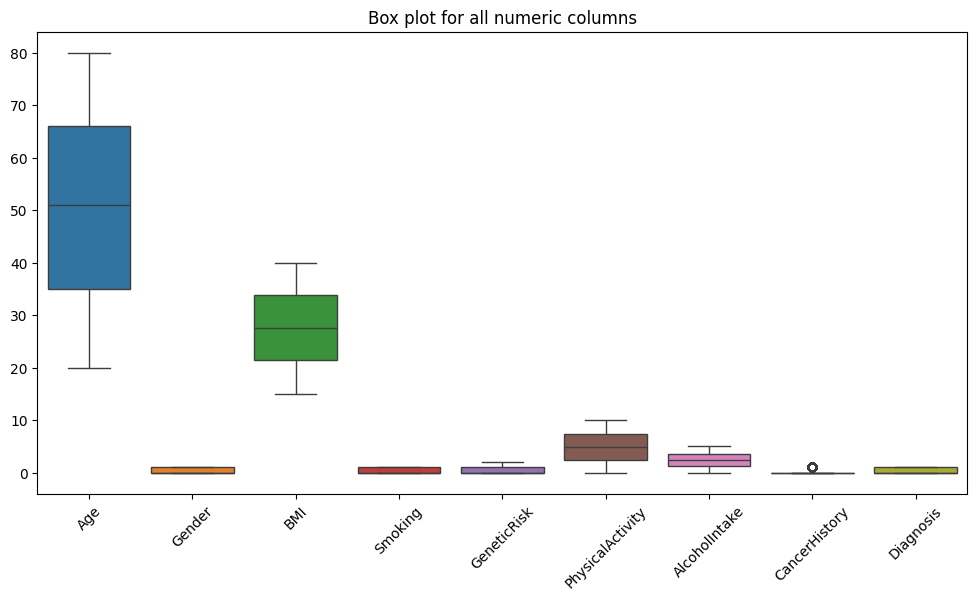

In [102]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Box plot for all numeric columns")
plt.xticks(rotation=45)
plt.show()

In [71]:
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0, 30, 45, 60, 100],
                        labels=['Young', 'Adult', 'MiddleAge', 'Senior'])


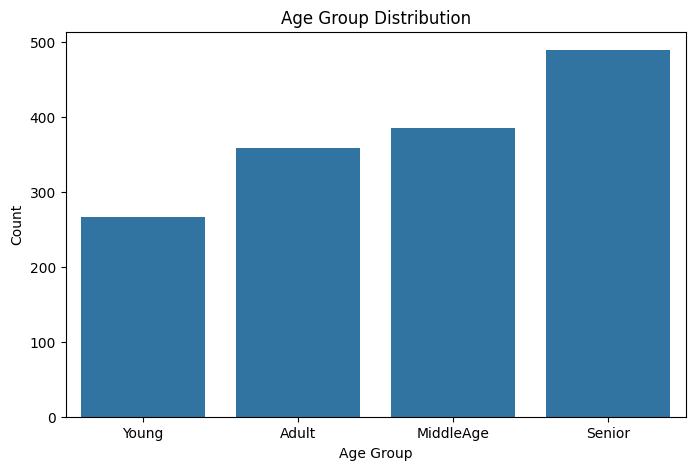

In [72]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='AgeGroup')

plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

In [73]:
df['BMICategory'] = pd.cut(df['BMI'],
                           bins=[0, 18.5, 24.9, 29.9, 100],
                           labels=['Underweight', 'Normal', 'Overweight', 'Obese'])


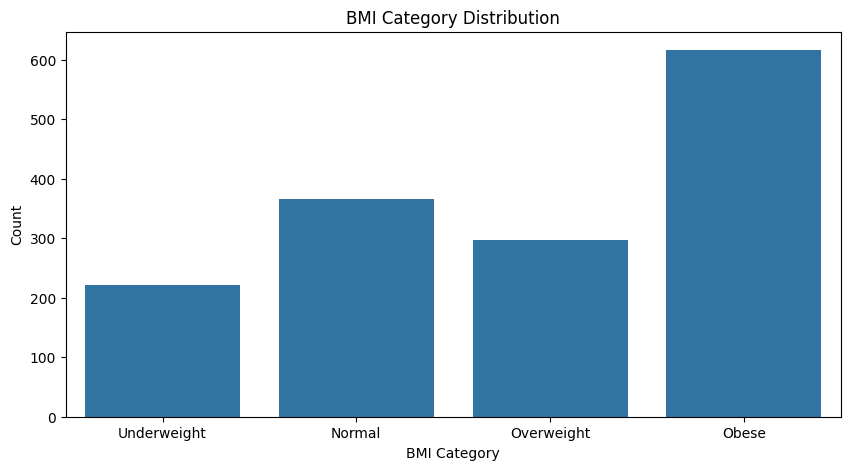

In [74]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='BMICategory')

plt.title("BMI Category Distribution")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.show()

In [75]:
df['AlcoholLevel'] = pd.qcut(df['AlcoholIntake'], q=3, labels=['Low','Medium','High'])


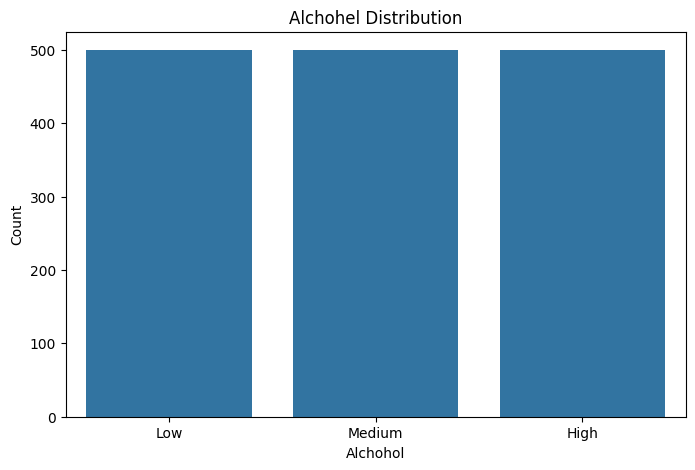

In [76]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='AlcoholLevel')

plt.title("Alchohel Distribution")
plt.xlabel("Alchohol")
plt.ylabel("Count")
plt.show()

In [77]:
df['ActivityLevel'] = pd.qcut(df['PhysicalActivity'], q=3, labels=['Low','Medium','High'])


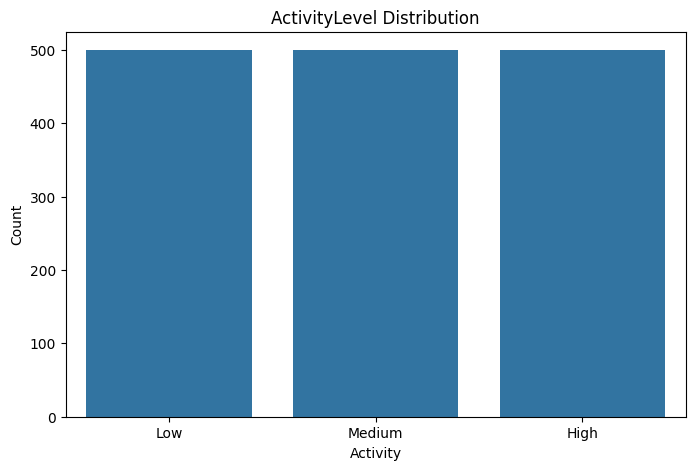

In [78]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='ActivityLevel')

plt.title("ActivityLevel Distribution")
plt.xlabel("Activity")
plt.ylabel("Count")
plt.show()




Feature Engineering

In [79]:
df['BMI_AgeInteraction'] = df['BMI'] * df['Age']


In [80]:
df.head()
df.columns


Index(['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity',
       'AlcoholIntake', 'CancerHistory', 'Diagnosis', 'CancerHistory_log',
       'Smoking_log', 'GeneticRisk_log', 'AgeGroup', 'BMICategory',
       'AlcoholLevel', 'ActivityLevel', 'BMI_AgeInteraction'],
      dtype='object')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 1500 non-null   int64   
 1   Gender              1500 non-null   int64   
 2   BMI                 1500 non-null   float64 
 3   Smoking             1500 non-null   int64   
 4   GeneticRisk         1500 non-null   int64   
 5   PhysicalActivity    1500 non-null   float64 
 6   AlcoholIntake       1500 non-null   float64 
 7   CancerHistory       1500 non-null   int64   
 8   Diagnosis           1500 non-null   int64   
 9   CancerHistory_log   1500 non-null   float64 
 10  Smoking_log         1500 non-null   float64 
 11  GeneticRisk_log     1500 non-null   float64 
 12  AgeGroup            1500 non-null   category
 13  BMICategory         1500 non-null   category
 14  AlcoholLevel        1500 non-null   category
 15  ActivityLevel       1500 non-null   ca

In [82]:
df.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis,CancerHistory_log,Smoking_log,GeneticRisk_log,BMI_AgeInteraction
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333,0.099813,0.186688,0.322278,1388.325452
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322,0.243438,0.307592,0.408111,623.962589
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000,0.000000,0.000000,0.000000,308.776182
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000,0.000000,0.000000,0.000000,890.263757
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000,0.000000,0.000000,0.000000,1309.745002
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000,0.000000,0.693147,0.693147,1809.222724
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000,0.693147,0.693147,1.098612,3115.250569


In [83]:
# Correlation matrix for numerical features
corr_matrix = df.corr(numeric_only=True)

print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                         Age    Gender       BMI   Smoking  GeneticRisk  \
Age                 1.000000  0.007145  0.030246 -0.013914    -0.027025   
Gender              0.007145  1.000000 -0.012516  0.035384    -0.004674   
BMI                 0.030246 -0.012516  1.000000 -0.012616     0.011392   
Smoking            -0.013914  0.035384 -0.012616  1.000000    -0.021039   
GeneticRisk        -0.027025 -0.004674  0.011392 -0.021039     1.000000   
PhysicalActivity    0.016396  0.023401  0.011480 -0.043817    -0.039721   
AlcoholIntake       0.003209  0.009723  0.004711 -0.001660    -0.016864   
CancerHistory      -0.010996  0.007657 -0.010824  0.016368    -0.010833   
Diagnosis           0.196603  0.250336  0.187560  0.226999     0.253472   
CancerHistory_log  -0.010996  0.007657 -0.010824  0.016368    -0.010833   
Smoking_log        -0.013914  0.035384 -0.012616  1.000000    -0.021039   
GeneticRisk_log    -0.034425 -0.000194  0.009755 -0.027910     0.989839   
BMI_A

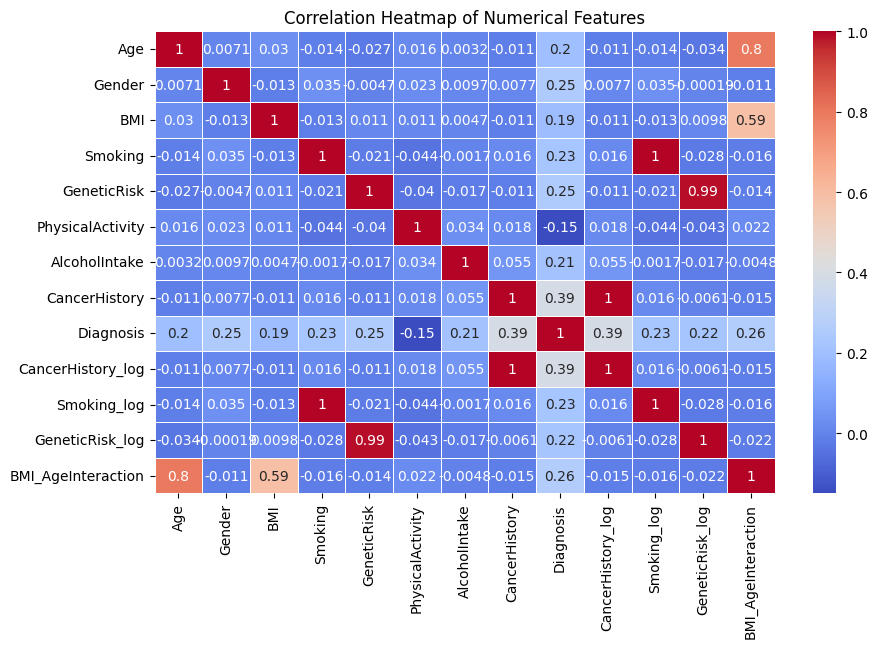

In [103]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


convert data types

In [40]:
categorical_cols = ['Gender', 'Smoking', 'GeneticRisk', 'CancerHistory', 'Diagnosis']

for col in categorical_cols:
    df[col] = df[col].astype('category')


In [41]:
numeric_cols=['Age','BMI','PhysicalActivity','AlcoholIntake']

In [42]:
minmax=MinMaxScaler()
df_minmax=df.copy()
df_minmax[numeric_cols]=minmax.fit_transform(df[numeric_cols])

In [43]:
std_scaler=StandardScaler()
df_standard=df.copy()
df_standard[numeric_cols]=std_scaler.fit_transform(df[numeric_cols])

In [44]:
df_zscore = df.copy()

df_zscore[numeric_cols] = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()


In [45]:
df.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis,CancerHistory_log,Smoking_log,GeneticRisk_log,AgeGroup,BMICategory,AlcoholLevel,ActivityLevel,BMI_AgeInteraction
0,58,1,16.085313,0,1,8.146251,4.148219,1,1,0.693147,0.0,0.693147,MiddleAge,Underweight,High,High,932.948173
1,71,0,30.828784,0,1,9.361630,3.519683,0,0,0.000000,0.0,0.693147,Senior,Obese,High,High,2188.843692
2,48,1,38.785084,0,2,5.135179,4.728368,0,1,0.000000,0.0,1.098612,MiddleAge,Obese,High,Medium,1861.684011
3,34,0,30.040296,0,0,9.502792,2.044636,0,0,0.000000,0.0,0.000000,Adult,Obese,Medium,High,1021.370047
4,62,1,35.479721,0,0,5.356890,3.309849,0,1,0.000000,0.0,0.000000,Senior,Obese,High,Medium,2199.742732


In [46]:
df_minmax.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis,CancerHistory_log,Smoking_log,GeneticRisk_log,AgeGroup,BMICategory,AlcoholLevel,ActivityLevel,BMI_AgeInteraction
0,0.633333,1,0.043473,0,1,0.815020,0.831746,1,1,0.693147,0.0,0.693147,MiddleAge,Underweight,High,High,932.948173
1,0.850000,0,0.634195,0,1,0.936653,0.705684,0,0,0.000000,0.0,0.693147,Senior,Obese,High,High,2188.843692
2,0.466667,1,0.952978,0,2,0.513678,0.948104,0,1,0.000000,0.0,1.098612,MiddleAge,Obese,High,Medium,1861.684011
3,0.233333,0,0.602603,0,0,0.950780,0.409840,0,0,0.000000,0.0,0.000000,Adult,Obese,Medium,High,1021.370047
4,0.700000,1,0.820543,0,0,0.535866,0.663598,0,1,0.000000,0.0,0.000000,Senior,Obese,High,Medium,2199.742732


In [47]:
df_standard.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis,CancerHistory_log,Smoking_log,GeneticRisk_log,AgeGroup,BMICategory,AlcoholLevel,ActivityLevel,BMI_AgeInteraction
0,0.435495,1,-1.581162,0,1,1.133713,1.219465,1,1,0.693147,0.0,0.693147,MiddleAge,Underweight,High,High,932.948173
1,1.172662,0,0.458722,0,1,1.557899,0.776474,0,0,0.000000,0.0,0.693147,Senior,Obese,High,High,2188.843692
2,-0.131556,1,1.559544,0,2,0.082804,1.628353,0,1,0.000000,0.0,1.098612,MiddleAge,Obese,High,Medium,1861.684011
3,-0.925428,0,0.349628,0,0,1.607166,-0.263137,0,0,0.000000,0.0,0.000000,Adult,Obese,Medium,High,1021.370047
4,0.662316,1,1.102219,0,0,0.160184,0.628583,0,1,0.000000,0.0,0.000000,Senior,Obese,High,Medium,2199.742732


In [48]:
df_zscore.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis,CancerHistory_log,Smoking_log,GeneticRisk_log,AgeGroup,BMICategory,AlcoholLevel,ActivityLevel,BMI_AgeInteraction
0,0.435350,1,-1.580635,0,1,1.133335,1.219059,1,1,0.693147,0.0,0.693147,MiddleAge,Underweight,High,High,932.948173
1,1.172271,0,0.458570,0,1,1.557379,0.776215,0,0,0.000000,0.0,0.693147,Senior,Obese,High,High,2188.843692
2,-0.131512,1,1.559024,0,2,0.082776,1.627810,0,1,0.000000,0.0,1.098612,MiddleAge,Obese,High,Medium,1861.684011
3,-0.925119,0,0.349512,0,0,1.606630,-0.263050,0,0,0.000000,0.0,0.000000,Adult,Obese,Medium,High,1021.370047
4,0.662095,1,1.101852,0,0,0.160131,0.628374,0,1,0.000000,0.0,0.000000,Senior,Obese,High,Medium,2199.742732


Scaling

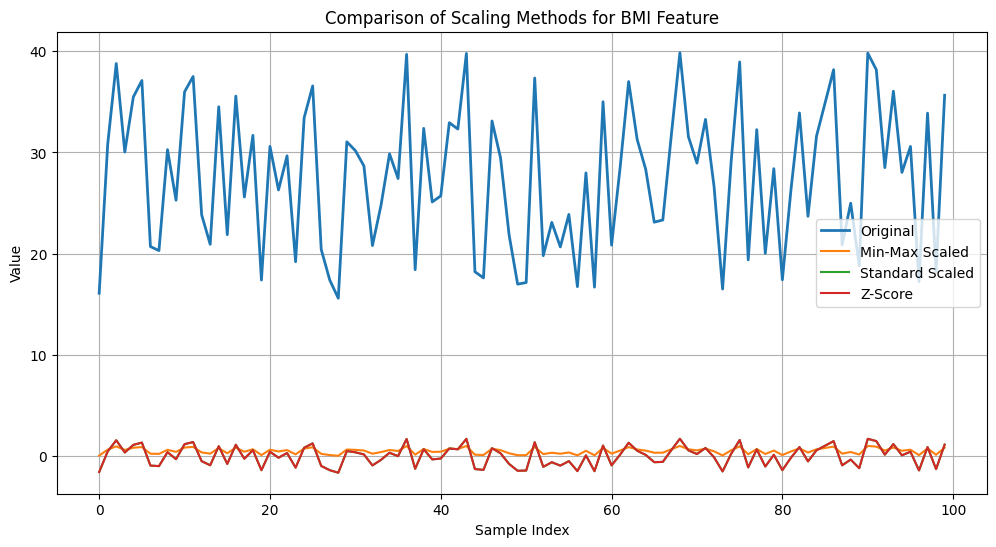

In [49]:

feature = "BMI"

x = df[[feature]]  

# ----- 1. Min-Max Scaling -----
minmax = MinMaxScaler()
df_minmax = minmax.fit_transform(x)

# ----- 2. StandardScaler -----
scaler = StandardScaler()
df_standard = scaler.fit_transform(x)

# ----- 3. Z-score (manual) -----
df_zscore = (x - x.mean()) / x.std()

# ----- Create Plot -----
plt.figure(figsize=(12, 6))
plt.plot(x.values[:100], label="Original", linewidth=2) 
plt.plot(df_minmax[:100], label="Min-Max Scaled")
plt.plot(df_standard[:100], label="Standard Scaled")
plt.plot(df_zscore.values[:100], label="Z-Score")

plt.title("Comparison of Scaling Methods for BMI Feature")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


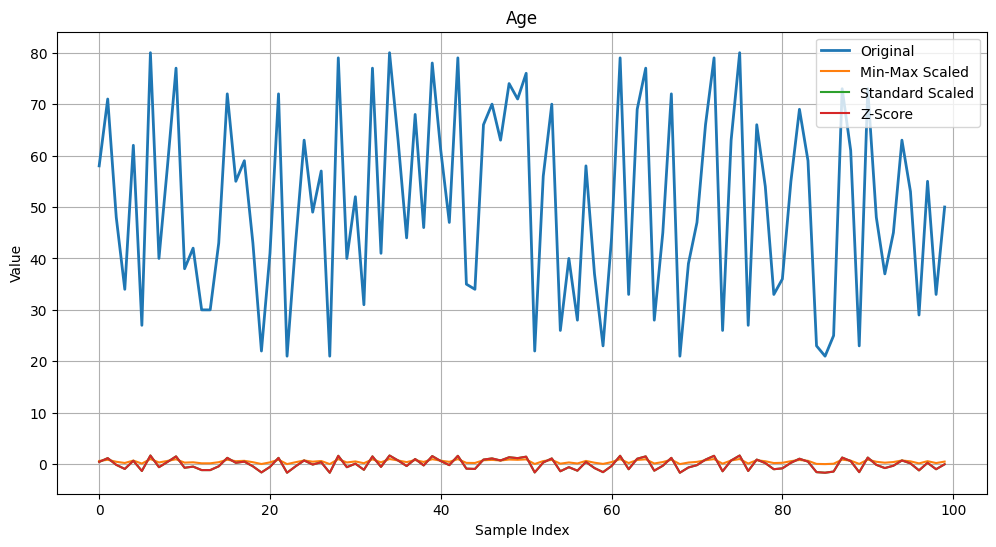

In [50]:

feature = "Age"

x = df[[feature]]
# ----- 1. Min-Max Scaling -----
minmax = MinMaxScaler()
df_minmax = minmax.fit_transform(x)

# ----- 2. StandardScaler -----
scaler = StandardScaler()
df_standard = scaler.fit_transform(x)

# ----- 3. Z-score (manual) -----
df_zscore = (x - x.mean()) / x.std()

# ----- Create Plot -----
plt.figure(figsize=(12, 6))
plt.plot(x.values[:100], label="Original", linewidth=2) 
plt.plot(df_minmax[:100], label="Min-Max Scaled")
plt.plot(df_standard[:100], label="Standard Scaled")
plt.plot(df_zscore.values[:100], label="Z-Score")

plt.title("Age")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()



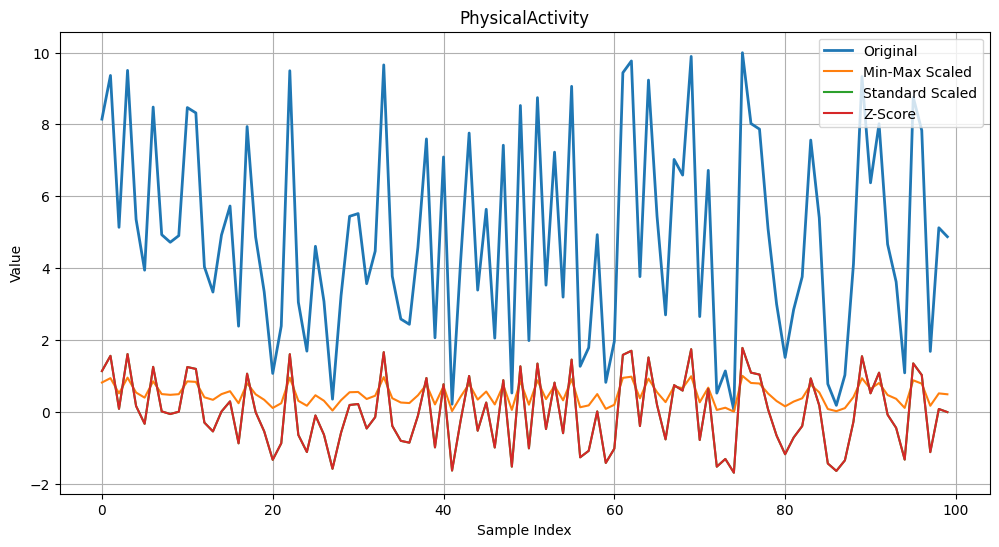

In [51]:

feature = "PhysicalActivity"

x = df[[feature]] 
# ----- 1. Min-Max Scaling -----
minmax = MinMaxScaler()
df_minmax = minmax.fit_transform(x)

# ----- 2. StandardScaler -----
scaler = StandardScaler()
df_standard = scaler.fit_transform(x)

# ----- 3. Z-score (manual) -----
df_zscore = (x - x.mean()) / x.std()

# ----- Create Plot -----
plt.figure(figsize=(12, 6))
plt.plot(x.values[:100], label="Original", linewidth=2) 
plt.plot(df_minmax[:100], label="Min-Max Scaled")
plt.plot(df_standard[:100], label="Standard Scaled")
plt.plot(df_zscore.values[:100], label="Z-Score")

plt.title("PhysicalActivity")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


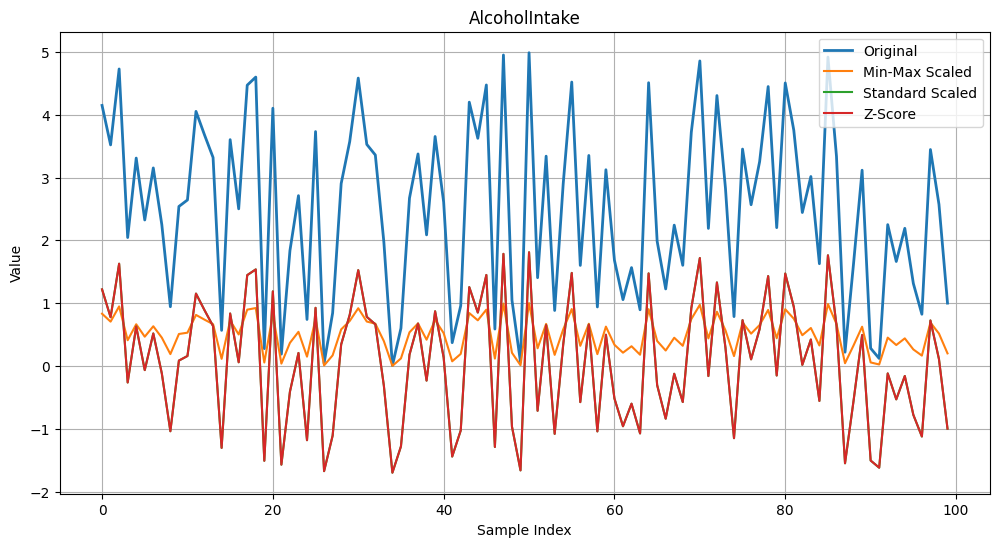

In [52]:
feature = "AlcoholIntake"

x = df[[feature]] 
# ----- 1. Min-Max Scaling -----
minmax = MinMaxScaler()
df_minmax = minmax.fit_transform(x)

# ----- 2. StandardScaler -----
scaler = StandardScaler()
df_standard = scaler.fit_transform(x)

# ----- 3. Z-score (manual) -----
df_zscore = (x - x.mean()) / x.std()

# ----- Create Plot -----
plt.figure(figsize=(12, 6))
plt.plot(x.values[:100], label="Original", linewidth=2) 
plt.plot(df_minmax[:100], label="Min-Max Scaled")
plt.plot(df_standard[:100], label="Standard Scaled")
plt.plot(df_zscore.values[:100], label="Z-Score")

plt.title("AlcoholIntake")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

Pivot Table:Average BMI by Gender & Smoking

In [53]:
pivot1=df.pivot_table(
    values='BMI',
    index='Gender',
    columns='Smoking',
    aggfunc='mean'
)

print(pivot1)

Smoking          0          1
Gender                       
0        27.599458  27.609897
1        27.535330  27.135178


C:\Users\User\AppData\Local\Temp\ipykernel_6496\2210582958.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot1=df.pivot_table(


Pivot Table:Count of patients by CancerHistory & Diagnosis

In [54]:
pivot2=df.pivot_table(
    values='Age',
    index='CancerHistory',
    columns='Diagnosis',
    aggfunc='count'
)

print(pivot2)

Diagnosis        0    1
CancerHistory          
0              907  377
1               36  180


C:\Users\User\AppData\Local\Temp\ipykernel_6496\2894089564.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot2=df.pivot_table(


Mean Age and BMI grouped by Diagnosis

In [55]:
pivot3=df.pivot_table(
    values=['Age','BMI'],
    index='Diagnosis',
    aggfunc='mean'
)
print(pivot3)

                 Age        BMI
Diagnosis                      
0          47.655355  26.471469
1          54.831239  29.277175


C:\Users\User\AppData\Local\Temp\ipykernel_6496\2725665286.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot3=df.pivot_table(


In [56]:
df.isna().sum()


Age                   0
Gender                0
BMI                   0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
AlcoholIntake         0
CancerHistory         0
Diagnosis             0
CancerHistory_log     0
Smoking_log           0
GeneticRisk_log       0
AgeGroup              0
BMICategory           0
AlcoholLevel          0
ActivityLevel         0
BMI_AgeInteraction    0
dtype: int64

In [57]:
df.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis,CancerHistory_log,Smoking_log,GeneticRisk_log,AgeGroup,BMICategory,AlcoholLevel,ActivityLevel,BMI_AgeInteraction
0,58,1,16.085313,0,1,8.146251,4.148219,1,1,0.693147,0.0,0.693147,MiddleAge,Underweight,High,High,932.948173
1,71,0,30.828784,0,1,9.361630,3.519683,0,0,0.000000,0.0,0.693147,Senior,Obese,High,High,2188.843692
2,48,1,38.785084,0,2,5.135179,4.728368,0,1,0.000000,0.0,1.098612,MiddleAge,Obese,High,Medium,1861.684011
3,34,0,30.040296,0,0,9.502792,2.044636,0,0,0.000000,0.0,0.000000,Adult,Obese,Medium,High,1021.370047
4,62,1,35.479721,0,0,5.356890,3.309849,0,1,0.000000,0.0,0.000000,Senior,Obese,High,Medium,2199.742732


In [58]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
cat_cols = ['AgeGroup', 'BMICategory', 'AlcoholLevel', 'ActivityLevel']

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


Train-Test Split

In [59]:
y = df["Diagnosis"]
X = df.drop("Diagnosis", axis=1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Model Training

 LINEAR REGRESSION

In [61]:
lin = LinearRegression()
lin.fit(X_train, y_train)
lin_pred = lin.predict(X_test)
mse_lin = mean_squared_error(y_test, lin_pred)

In [62]:
import pandas as pd

linear_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lin.coef_
}).sort_values(by="Coefficient", ascending=False)

linear_importance


,Feature,Coefficient
4,GeneticRisk,1.316005
7,CancerHistory,0.366087
8,CancerHistory_log,0.253752
1,Gender,0.241781
3,Smoking,0.154040
9,Smoking_log,0.106772
6,AlcoholIntake,0.062701
11,AgeGroup,0.032748
12,BMICategory,0.031283
2,BMI,0.008037


 RIDGE REGRESSION

In [63]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, ridge_pred)

In [64]:
import pandas as pd

ridge_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": ridge.coef_
}).sort_values(by="Coefficient", ascending=False)

ridge_importance


,Feature,Coefficient
4,GeneticRisk,1.012381
7,CancerHistory,0.362825
8,CancerHistory_log,0.251491
1,Gender,0.239491
3,Smoking,0.155391
9,Smoking_log,0.107709
6,AlcoholIntake,0.063684
11,AgeGroup,0.032915
12,BMICategory,0.031447
2,BMI,0.007731


LASSO REGRESSION

In [65]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, lasso_pred)

In [66]:
import pandas as pd

lasso_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lasso.coef_
}).sort_values(by="Coefficient", ascending=False)

lasso_importance


,Feature,Coefficient
7,CancerHistory,0.450624
1,Gender,0.196645
3,Smoking,0.188423
4,GeneticRisk,0.166518
6,AlcoholIntake,0.061560
12,BMICategory,0.022434
11,AgeGroup,0.021703
2,BMI,0.004886
15,BMI_AgeInteraction,0.000187
0,Age,0.000121


PRINT MSE VALUES

In [67]:
print("\nMSE Comparison:")
print("----------------------------")
print("Linear Regression:", mse_lin)
print("Ridge Regression :", mse_ridge)
print("Lasso Regression :", mse_lasso)


MSE Comparison:
----------------------------
Linear Regression: 0.10487532224629775
Ridge Regression : 0.10497830961158432
Lasso Regression : 0.11588619168863053


COEFFICIENT COMPARISON

In [68]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear": lin.coef_,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_
})

print("\nCoefficient Comparison:")
print(coef_df)


Coefficient Comparison:
               Feature    Linear     Ridge     Lasso
0                  Age  0.001242  0.001142  0.000121
1               Gender  0.241781  0.239491  0.196645
2                  BMI  0.008037  0.007731  0.004886
3              Smoking  0.154040  0.155391  0.188423
4          GeneticRisk  1.316005  1.012381  0.166518
5     PhysicalActivity -0.036469 -0.035979 -0.030277
6        AlcoholIntake  0.062701  0.063684  0.061560
7        CancerHistory  0.366087  0.362825  0.450624
8    CancerHistory_log  0.253752  0.251491  0.000000
9          Smoking_log  0.106772  0.107709  0.000000
10     GeneticRisk_log -1.889558 -1.382853 -0.000000
11            AgeGroup  0.032748  0.032915  0.021703
12         BMICategory  0.031283  0.031447  0.022434
13        AlcoholLevel -0.005543 -0.003146 -0.000000
14       ActivityLevel -0.053673 -0.052184 -0.024892
15  BMI_AgeInteraction  0.000134  0.000142  0.000187


BAR PLOT for MSE

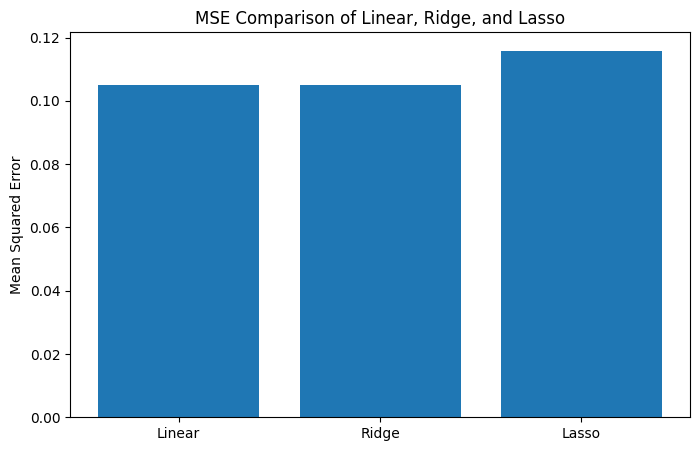

In [69]:
plt.figure(figsize=(8, 5))
models = ["Linear", "Ridge", "Lasso"]
mse_values = [mse_lin, mse_ridge, mse_lasso]

plt.bar(models, mse_values)
plt.title("MSE Comparison of Linear, Ridge, and Lasso")
plt.ylabel("Mean Squared Error")
plt.show()


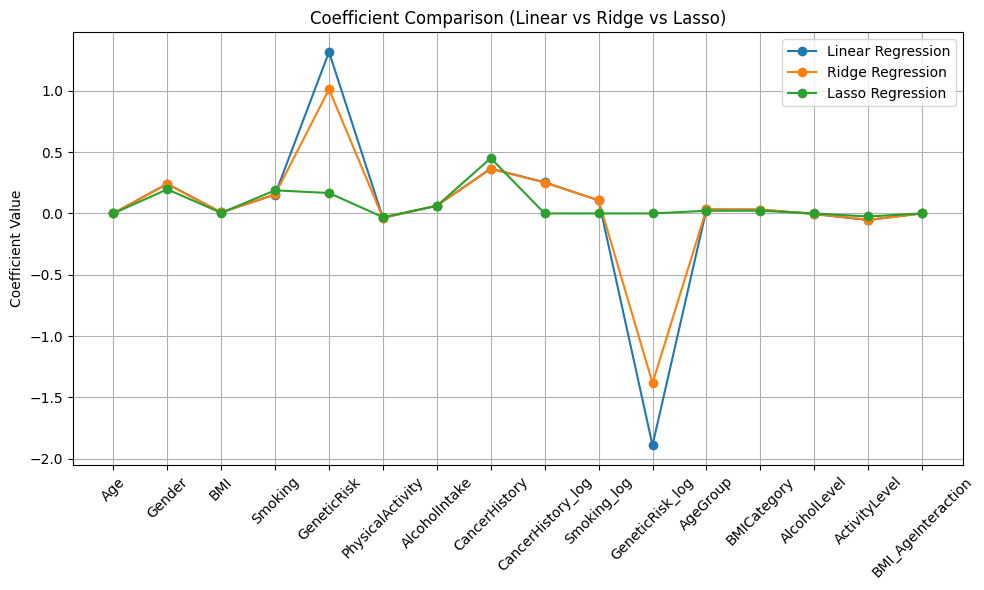

In [70]:
plt.figure(figsize=(10, 6))

plt.plot(coef_df["Feature"], coef_df["Linear"], marker='o', label="Linear Regression")
plt.plot(coef_df["Feature"], coef_df["Ridge"], marker='o', label="Ridge Regression")
plt.plot(coef_df["Feature"], coef_df["Lasso"], marker='o', label="Lasso Regression")

plt.xticks(rotation=45)
plt.title("Coefficient Comparison (Linear vs Ridge vs Lasso)")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [71]:
tree_depth1=DecisionTreeClassifier(max_depth=1,random_state=42)
tree_depth1.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [72]:
y_train_pred1=tree_depth1.predict(X_train)
y_test_pred1=tree_depth1.predict(X_test)

In [73]:
train_error1=mean_squared_error(y_train,y_train_pred1)
test_error1=mean_squared_error(y_test,y_test_pred1)

train_error1,test_error1

(0.27416666666666667, 0.28)

In [74]:
# Model depth = 10
tree_depth10 = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_depth10.fit(X_train, y_train)

# Predictions
y_train_pred10 = tree_depth10.predict(X_train)
y_test_pred10  = tree_depth10.predict(X_test)

# Errors
train_error10 = mean_squared_error(y_train, y_train_pred10)
test_error10 = mean_squared_error(y_test, y_test_pred10)

train_error10, test_error10


(0.016666666666666666, 0.11666666666666667)

In [75]:
train_errors = []
test_errors = []
depths = range(1, 11)

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

train_errors, test_errors


([0.27416666666666667,
  0.21583333333333332,
  0.20833333333333334,
  0.1625,
  0.145,
  0.09916666666666667,
  0.07,
  0.0375,
  0.025,
  0.016666666666666666],
 [0.28,
  0.21333333333333335,
  0.21666666666666667,
  0.17333333333333334,
  0.19,
  0.14666666666666667,
  0.12333333333333334,
  0.12333333333333334,
  0.10666666666666667,
  0.11666666666666667])

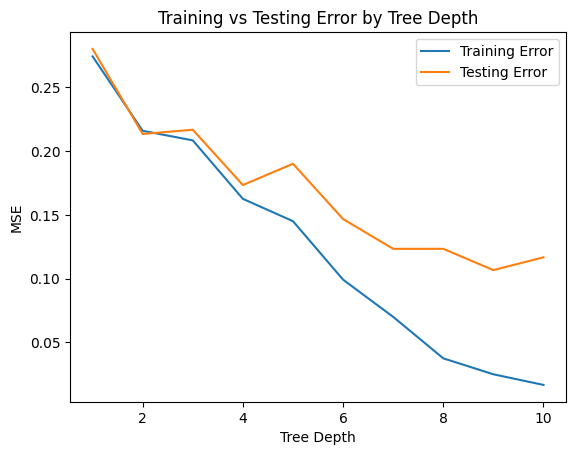

In [76]:
import matplotlib.pyplot as plt

plt.plot(depths, train_errors, label="Training Error")
plt.plot(depths, test_errors, label="Testing Error")
plt.xlabel("Tree Depth")
plt.ylabel("MSE")
plt.title("Training vs Testing Error by Tree Depth")
plt.legend()
plt.show()


In [77]:
from sklearn.metrics import r2_score


ridge_r2 = r2_score(y_test, ridge_pred)
print("Ridge R² Score:", ridge_r2)


Ridge R² Score: 0.5573440842839865


In [78]:
best_tree = DecisionTreeClassifier(max_depth=9, random_state=42)
best_tree.fit(X_train, y_train)

# Predict
tree_pred = best_tree.predict(X_test)

# Compute R²
tree_r2 = r2_score(y_test, tree_pred)
print("Decision Tree R² Score:", tree_r2)

Decision Tree R² Score: 0.5502248875562218


In [79]:
print("\nR² Score Comparison")
print("----------------------------")
print("Ridge Regression R² :", ridge_r2)
print("Decision Tree R²    :", tree_r2)



R² Score Comparison
----------------------------
Ridge Regression R² : 0.5573440842839865
Decision Tree R²    : 0.5502248875562218


Train a Random Forest Model

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Random Forest model (regressor since Diagnosis is 0/1)
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

# Train
rf.fit(X_train, y_train)

# Predictions
rf_pred = rf.predict(X_test)

# Evaluation
rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

print("Random Forest R² Score:", rf_r2)
print("Random Forest MSE:", rf_mse)


Random Forest R² Score: 0.6338567044602698
Random Forest MSE: 0.08683291666666666


Compare With Your Other Models

In [81]:
print("\nModel Comparison (R² Score):")
print("--------------------------------")
print("Ridge Regression :", ridge_r2)
print("Decision Tree    :", tree_r2)
print("Random Forest    :", rf_r2)

print("\nModel Comparison (MSE):")
print("--------------------------------")
print("Ridge Regression :", mse_ridge)
# print("Decision Tree    :", mse_dt)
print("Random Forest    :", rf_mse)


Model Comparison (R² Score):
--------------------------------
Ridge Regression : 0.5573440842839865
Decision Tree    : 0.5502248875562218
Random Forest    : 0.6338567044602698

Model Comparison (MSE):
--------------------------------
Ridge Regression : 0.10497830961158432
Random Forest    : 0.08683291666666666


In [82]:
import pandas as pd

# Get feature importances
importances = rf.feature_importances_

# Create a table
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


               Feature  Importance
15  BMI_AgeInteraction    0.136178
6        AlcoholIntake    0.125725
5     PhysicalActivity    0.120591
8    CancerHistory_log    0.085413
1               Gender    0.084231
2                  BMI    0.081713
7        CancerHistory    0.068633
10     GeneticRisk_log    0.066741
4          GeneticRisk    0.065668
0                  Age    0.055716
9          Smoking_log    0.034603
3              Smoking    0.031969
12         BMICategory    0.020195
11            AgeGroup    0.009726
13        AlcoholLevel    0.006494
14       ActivityLevel    0.006403


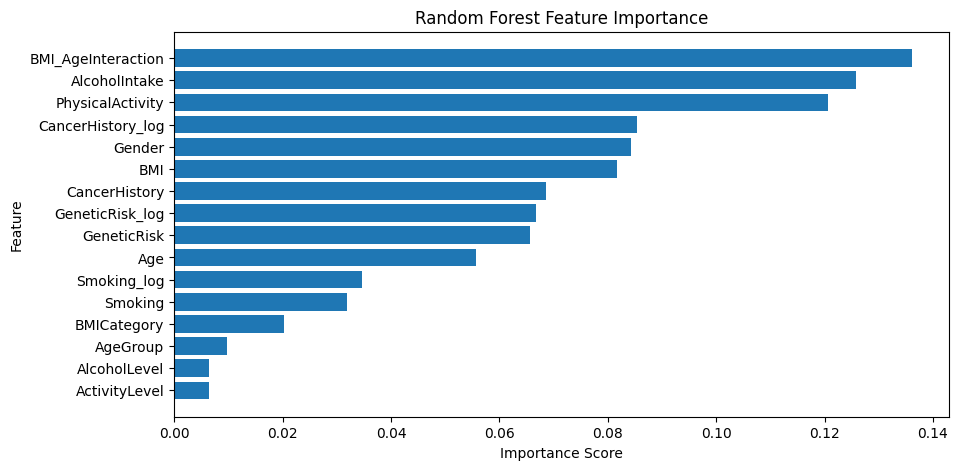

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()



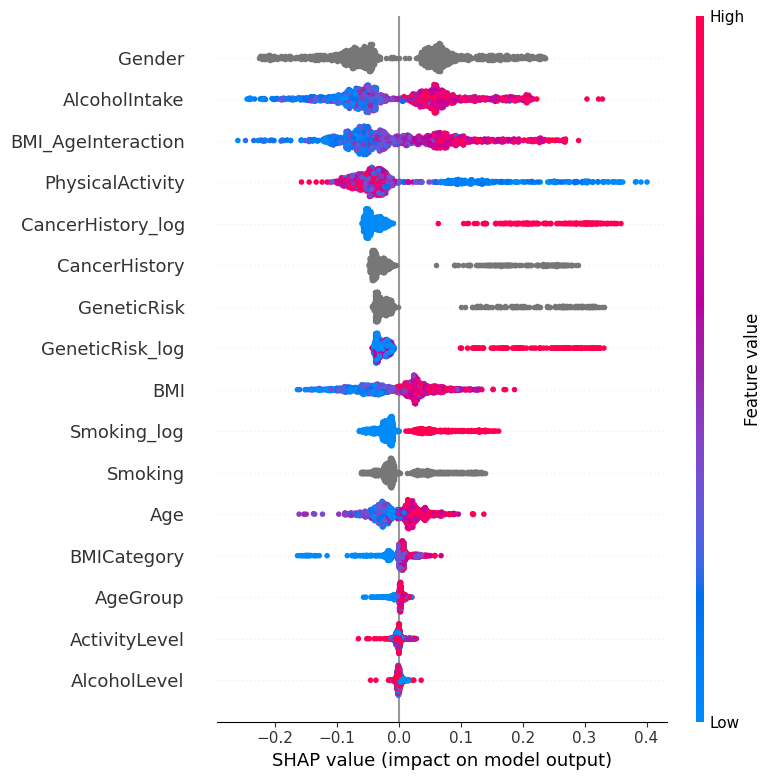

In [84]:
import shap

# Train or use  existing model
model = rf   
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Summary Plot (Global Feature Importance)
shap.summary_plot(shap_values, X_train)
